In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
X = data[['Age', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation']]

for column in X.columns:
    if X.dtypes[column] == 'int64':
        continue
    X.replace(to_replace={value: index for index, value in enumerate(set(X[column]))}, inplace=True)
print(X)

      Age  Profession  Work_Experience  Spending_Score  Family_Size  \
0      22           0              0.0               1          3.0   
1      38           5              0.0               0          2.0   
2      67           5              0.0               1          0.0   
3      67           8              0.0               0          1.0   
4      40           3              0.0               0          5.0   
...   ...         ...              ...             ...          ...   
8063   22           0              0.0               1          6.0   
8064   35           1              2.0               1          3.0   
8065   33           0              0.0               1          0.0   
8066   27           0              0.0               1          3.0   
8067   37           1              0.0               0          2.0   

      Segmentation  
0                3  
1                0  
2                1  
3                1  
4                0  
...            ...  


C:\Users\XoJIoDuJIHuK\AppData\Local\Temp\ipykernel_3284\3328338309.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace(to_replace={value: index for index, value in enumerate(set(X[column]))}, inplace=True)
C:\Users\XoJIoDuJIHuK\AppData\Local\Temp\ipykernel_3284\3328338309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(to_replace={value: index for index, value in enumerate(set(X[column]))}, inplace=True)
C:\Users\XoJIoDuJIHuK\AppData\Local\Temp\ipykernel_3284\3328338309.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)

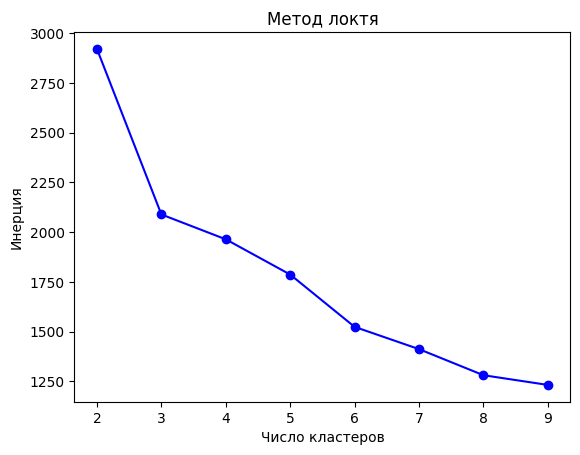

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

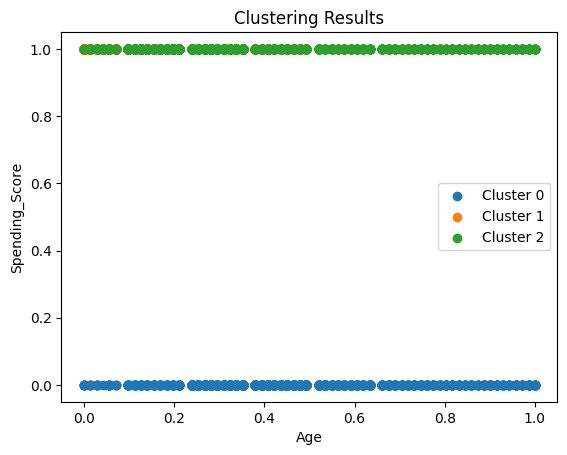

In [4]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_X)
clusters = kmeans.predict(normalized_X)

param1 = 'Age'
param2 = 'Spending_Score'

for cluster_label in range(k):
    cluster_points = normalized_X[clusters == cluster_label]
    plt.scatter(cluster_points[:, X.columns.get_loc(param1)], cluster_points[:, X.columns.get_loc(param2)], label=f'Cluster {cluster_label}')

plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Clustering Results')
plt.legend()

plt.show()

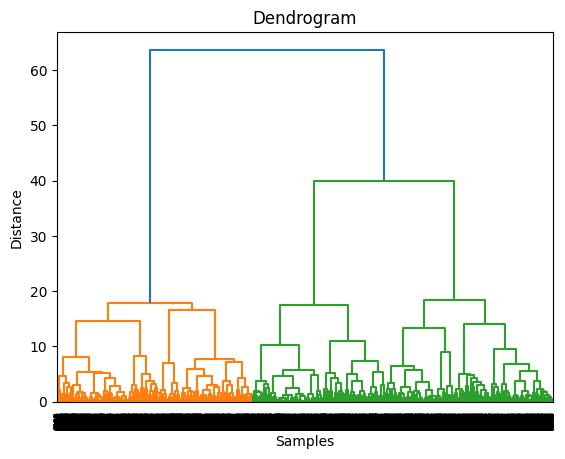

In [5]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=4)

clustering.fit(normalized_X)
distance_matrix = sch.linkage(normalized_X, method='ward')

# Постройте дендрограмму
sch.dendrogram(distance_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

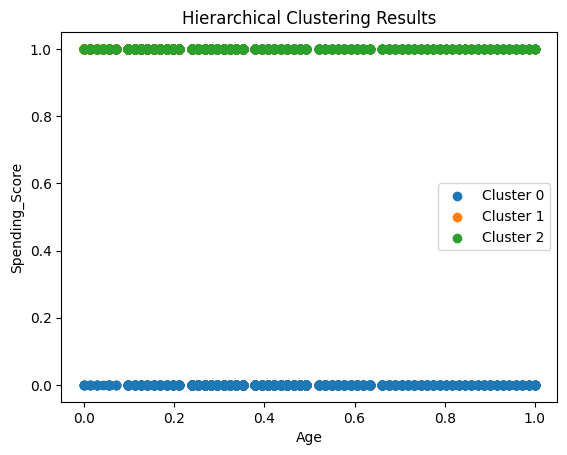

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Выберите два параметра для визуализации
param1 = 'Age'
param2 = 'Spending_Score'

# Создайте график рассеяния для каждого кластера
for cluster_label in np.unique(clusters):
    cluster_points = normalized_X[clusters == cluster_label]
    plt.scatter(cluster_points[:, X.columns.get_loc(param1)], cluster_points[:, X.columns.get_loc(param2)], label=f'Cluster {cluster_label}')

# Добавьте подписи осей и легенду
plt.xlabel(param1)
plt.ylabel(param2)
plt.title('Hierarchical Clustering Results')
plt.legend()

# Отобразите график рассеяния
plt.show()

In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
kmeans_labels = [0, 1, 2]
hierarchical_labels = [0, 1, 2]
kmeans_silhouette = silhouette_score(normalized_X, kmeans_labels)
hierarchical_silhouette = silhouette_score(normalized_X, hierarchical_labels)

print(f"Silhouette Score (K-means): {kmeans_silhouette}")
print(f"Silhouette Score (Hierarchical): {hierarchical_silhouette}")
kmeans_db_index = davies_bouldin_score(normalized_X, kmeans_labels)
hierarchical_db_index = davies_bouldin_score(normalized_X, hierarchical_labels)

print(f"Davies-Bouldin Index (K-means): {kmeans_db_index}")
print(f"Davies-Bouldin Index (Hierarchical): {hierarchical_db_index}")

ValueError: Found input variables with inconsistent numbers of samples: [8068, 3]